First 5 rows of dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing va

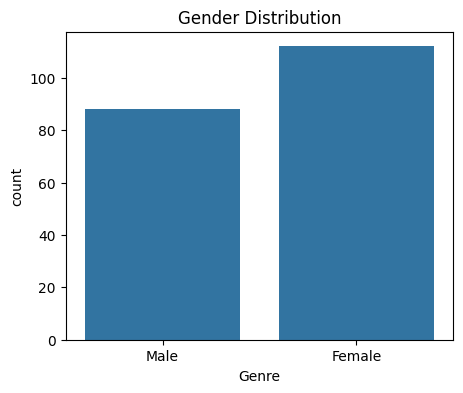

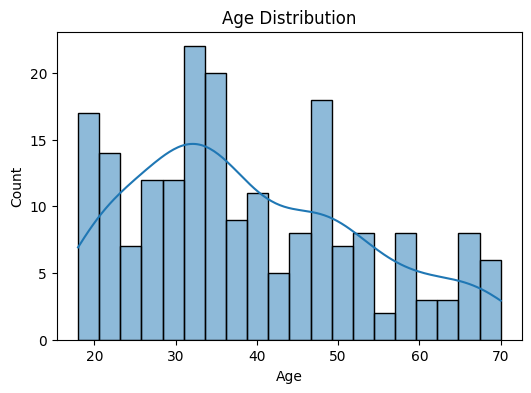

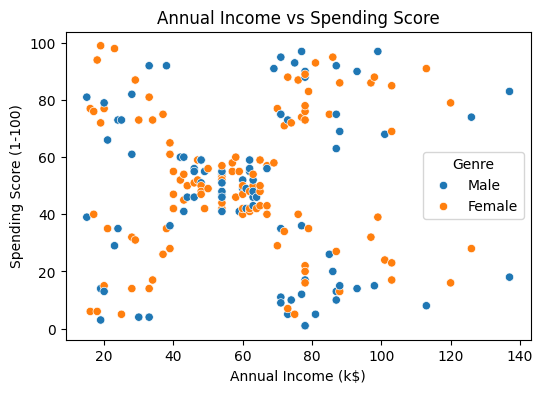

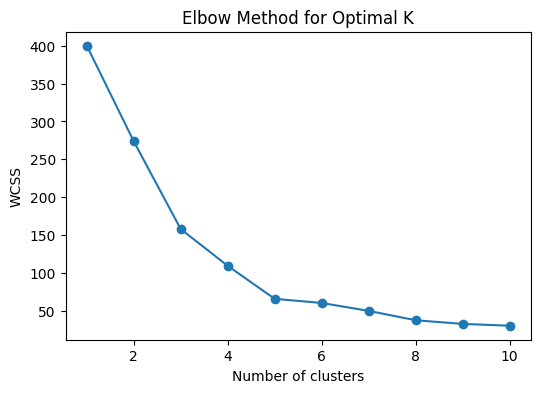


First 10 rows with cluster labels:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


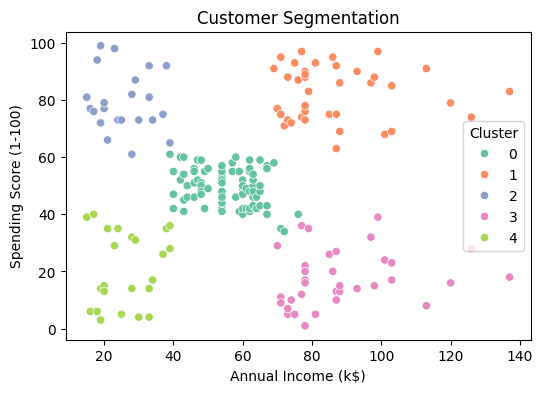

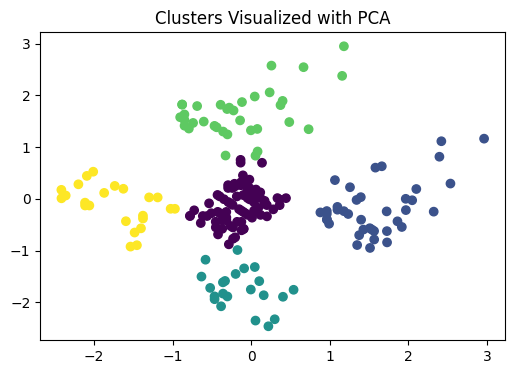

In [3]:
# Task 2: Customer Segmentation Using Unsupervised Learning

# ---------------------------
# 1. Problem Statement & Objective
# ---------------------------
# The goal of this task is to segment customers based on their spending habits.
# We will use K-Means clustering to group similar customers together and then
# suggest marketing strategies for each cluster.

# ---------------------------
# 2. Importing Libraries
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ---------------------------
# 3. Load the Dataset
# ---------------------------
df = pd.read_csv("/content/Mall_Customers.csv")
print("First 5 rows of dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# ---------------------------
# 4. Dataset Description
# ---------------------------
# Columns:
# CustomerID - Unique ID for each customer
# Genre - Male/Female
# Age - Age of the customer
# Annual Income (k$) - Annual income in thousands
# Spending Score (1-100) - How much they spend, score between 1 to 100

# ---------------------------
# 5. Exploratory Data Analysis (EDA)
# ---------------------------

# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Basic statistics
print("\nDataset Summary:")
print(df.describe())

# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Genre", data=df)
plt.title("Gender Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre", data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

# ---------------------------
# 6. Data Preprocessing
# ---------------------------
# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 7. Finding Optimal K (Elbow Method)
# ---------------------------
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Based on the elbow curve, let's choose k = 5

# ---------------------------
# 8. Apply K-Means Clustering
# ---------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df["Cluster"] = y_kmeans

print("\nFirst 10 rows with cluster labels:")
print(df.head(10))

# ---------------------------
# 9. Visualize the Clusters
# ---------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue=df["Cluster"], palette="Set2", data=df)
plt.title("Customer Segmentation")
plt.show()

# ---------------------------
# 10. Dimensionality Reduction with PCA (for visualization)
# ---------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="viridis")
plt.title("Clusters Visualized with PCA")
plt.show()

# ---------------------------
# 11. Insights and Marketing Strategies
# ---------------------------
# Cluster 0: High income, low spending → Offer loyalty programs to increase spending
# Cluster 1: Low income, low spending → Focus on affordable products and discounts
# Cluster 2: Average income, average spending → Maintain engagement with seasonal offers
# Cluster 3: High income, high spending → Premium membership and exclusive services
# Cluster 4: Low income, high spending → Attractive combo offers and budget-friendly plans
